In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
df = pd.read_csv(r"D:\\Python\\Insurance\\insurance.csv")
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='charges'>

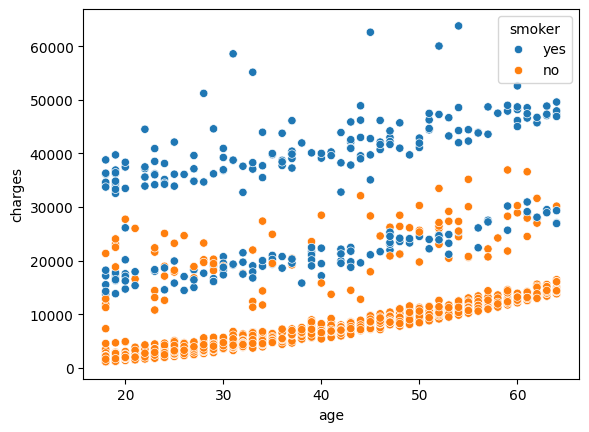

In [54]:
sns.scatterplot(x="age",y="charges",hue='smoker',data=df)


In [55]:
df.children.value_counts()


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

C:\Users\gunji.prakash\AppData\Local\Temp\ipykernel_20908\2123800172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"])


<Axes: xlabel='charges', ylabel='Density'>

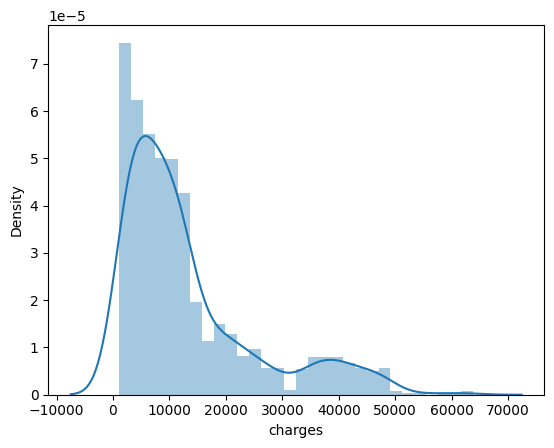

In [56]:
sns.distplot(df["charges"])


C:\Users\gunji.prakash\AppData\Local\Temp\ipykernel_20908\2055171341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

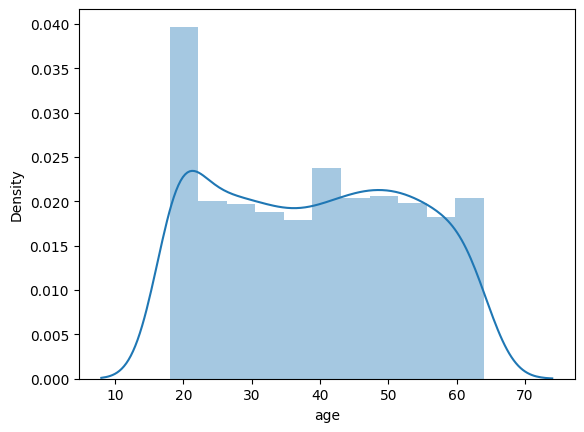

In [57]:
sns.distplot(df["age"])


In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


c:\Users\gunji.prakash\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gunji.prakash\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\gunji.prakash\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gunji.prakash\AppData

<Axes: xlabel='age', ylabel='charges'>

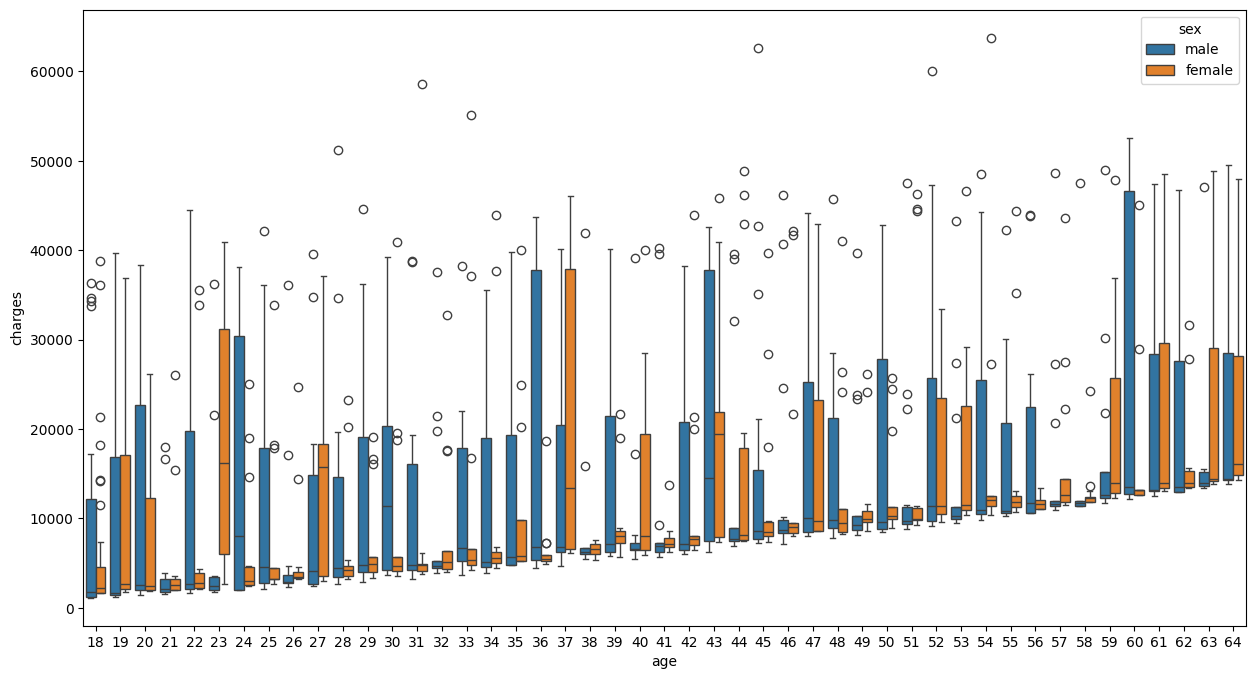

In [59]:
plt.figure(figsize=(15,8))
sns.boxplot(x='age',y='charges',hue='sex',data=df)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [61]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [63]:
cat_feat = ['sex', 'children', 'smoker', 'region']
num_feat = ['age','bmi']

In [64]:
oneht = OneHotEncoder(drop='first')
std = StandardScaler()

In [65]:
preprocessor = ColumnTransformer(transformers=[('num', std, num_feat),('cat', oneht, cat_feat)])


In [66]:
grid_param4 = {'dt__criterion': ["mse","mae"],
    'dt__max_depth' : range(2,32,1),
    'dt__min_samples_leaf' : range(1,10,1),
    'dt__min_samples_split': range(2,10,1),
    'dt__splitter' : ['best', 'random']}
grid_param5 = {'rf__n_estimators':[10,25,50,100,150,200],'rf__criterion': ["mse","mae"],
    'rf__max_depth' : range(2,32,1),
    'rf__min_samples_leaf' : range(1,10,1),
    'rf__min_samples_split': range(2,10,1),
    'rf__max_features': ["auto","sqrt","log2"]}

In [68]:
pipe1 = Pipeline(steps=[('preprocessor1',preprocessor),('lr',LinearRegression())])
pipe2 = Pipeline(steps=[('preprocessor2',preprocessor),('laso',Lasso())])
pipe3 = Pipeline(steps=[('preprocessor3',preprocessor),('ridge',Ridge())])
pipe4 = Pipeline(steps=[('preprocessor4',preprocessor),('dt',DecisionTreeRegressor())])
pipe5 = Pipeline(steps=[('preprocessor5',preprocessor),('rf',RandomForestRegressor())])

In [69]:
pipelines = [pipe1, pipe2, pipe3, pipe4,pipe5]
pipe_dict = {0: 'Linear Regression', 1: 'Lasso', 2: 'Ridge',3:'Decision Tree',4:'Random Forest'}
for pipe in pipelines:
    pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i], model.score(X_test,y_test)))

Linear Regression Test Accuracy:0.7675432393370196
Lasso Test Accuracy:0.7675611531489156
Ridge Test Accuracy:0.7675074244113005
Decision Tree Test Accuracy:0.6966097641296953
Random Forest Test Accuracy:0.8520095904678949


In [48]:
for i,model in enumerate(pipelines):
    print("{} Train Accuracy:{}".format(pipe_dict[i], model.score(X_train,y_train)))

Linear Regression Train Accuracy:0.7443271565246132
Lasso Train Accuracy:0.7443253454766152
Ridge Train Accuracy:0.7442924539952123
Decision Tree Train Accuracy:1.0
Random Forest Train Accuracy:0.976325521266467


In [71]:
gcv4 = GridSearchCV(pipe4,grid_param4,cv=5,n_jobs=-1)
gcv4.fit(X_train,y_train)

KeyboardInterrupt: 

In [72]:
pipe4 = Pipeline(steps=[('preprocessor4',preprocessor),('dt',DecisionTreeRegressor(max_depth=4,min_samples_leaf=9,min_samples_split=2,splitter='best'))])
pipe4.fit(X_train,y_train)

Pipeline(steps=[('preprocessor4',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'children', 'smoker',
                                                   'region'])])),
                ('dt', DecisionTreeRegressor(max_depth=4, min_samples_leaf=9))])

In [73]:
pipe4 = Pipeline(steps=[('preprocessor4',preprocessor),('dt',DecisionTreeRegressor(max_depth=4,min_samples_leaf=9,min_samples_split=2,splitter='best'))])
pipe4.fit(X_train,y_train)

Pipeline(steps=[('preprocessor4',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'children', 'smoker',
                                                   'region'])])),
                ('dt', DecisionTreeRegressor(max_depth=4, min_samples_leaf=9))])

In [74]:
pipe4.score(X_train,y_train)


0.8647216596606787

In [75]:
pipe4.score(X_test,y_test)


0.8608150368450247

In [76]:
pred = pipe4.predict(X_test)


In [78]:
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error 


In [79]:
mse=mean_squared_error(y_test,pred)
mse

20407898.8918677

In [80]:
y_test.mean()


13017.24813835572

In [81]:
import pickle
pickleout = open("insurance_predict.pkl",'wb')
pickle.dump(pipe4,pickleout)
pickleout.close()